# Subsequences

This notebook describes the use of subsequences.

Subsequences can be useful in a wide range of settings.

In [1]:
%matplotlib notebook

import broadbean as bb

sine = bb.PulseAtoms.sine
ramp = bb.PulseAtoms.ramp

## Example 1: Compression

In a waveform with very long "dead" periods, subsequences can -- via the option to repeat elements -- drastically reduce the number of points of the entire sequence.

Here we imagine a pulse sequence where we first wait, then perturb the system, then wait some more for readout. We'd like to vary the height of the perturbation.

### Uncompressed

In [2]:
# Uncompressed

SR = 1e9
t1 = 200e-6  # wait
t2 = 20e-9  # perturb the system
t3 = 250e-6  # read out

bp1 = bb.BluePrint()
bp1.insertSegment(0, ramp, (0, 0), dur=t1)
bp1.insertSegment(1, ramp, (1, 1), dur=t2, name='perturbation')
bp1.insertSegment(2, ramp, (0, 0), dur=t3)
bp1.setSR(SR)

<IPython.core.display.Javascript object>


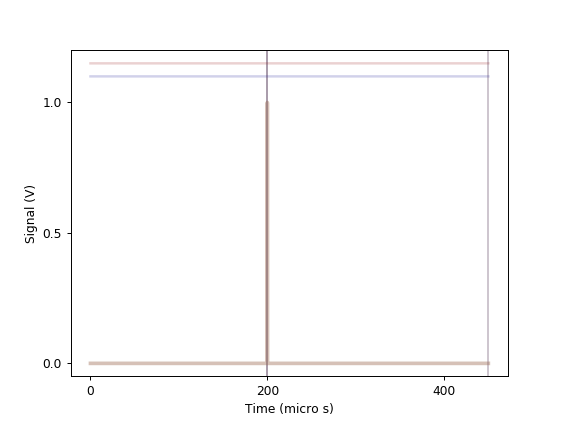

In [3]:
bp1.plot()

In [5]:
# Now make a variation of the height

elem1 = bb.Element()
elem1.addBluePrint(1, bp1)

elem2 = elem1.copy()
elem2.changeArg(1, 'perturbation', 'start', 0.75)
elem2.changeArg(1, 'perturbation', 'stop', 0.75)

elem3 = elem1.copy()
elem3.changeArg(1, 'perturbation', 'start', 0.5)
elem3.changeArg(1, 'perturbation', 'stop', 0.5)

# And put that together in a sequence
seq = bb.Sequence()
seq.addElement(1, elem1)
seq.addElement(2, elem2)
seq.addElement(3, elem3)
seq.setSR(SR)

<IPython.core.display.Javascript object>


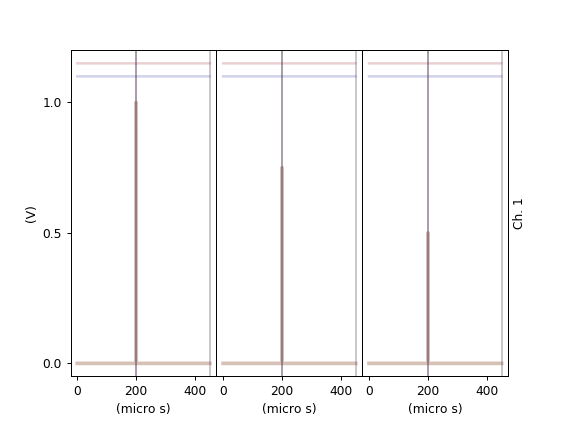

In [6]:
seq.plotSequence()

In [8]:
# The sequence is long and heavy on the memory
seq.points

1350060

### Compressed

<IPython.core.display.Javascript object>


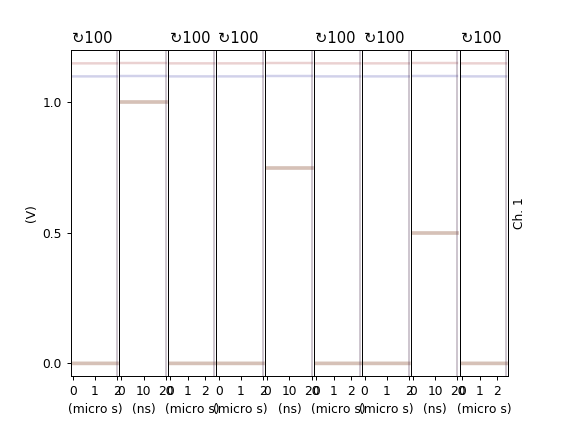

In [9]:
# Let's make a sequence instead of an element

SR = 1e9
t1 = 200e-6  # wait
t2 = 20e-9  # perturb the system
t3 = 250e-6  # read out

compression = 100  # this number has to be chosen with some care

bp1 = bb.BluePrint()
bp1.insertSegment(0, ramp, (0, 0), dur=t1/compression)
bp1.setSR(SR)
elem1 = bb.Element()
elem1.addBluePrint(1, bp1)
#
bp2 = bb.BluePrint()
bp2.insertSegment(0, ramp, (1, 1), dur=t2, name='perturbation')
bp2.setSR(SR)
elem2 = bb.Element()
elem2.addBluePrint(1, bp2)
#
bp3 = bb.BluePrint()
bp3.insertSegment(0, ramp, (0, 0), dur=t3/compression)
bp3.setSR(SR)
elem3 = bb.Element()
elem3.addBluePrint(1, bp3)

seq = bb.Sequence()
seq.addElement(1, elem1)
seq.setSequencingNumberOfRepetitions(1, compression)
seq.addElement(2, elem2)
seq.addElement(3, elem3)
seq.setSequencingNumberOfRepetitions(3, compression)
seq.setSR(SR)

# Now make the variation
seq2 = seq.copy()
seq2.element(2).changeArg(1, 'perturbation', 'start', 0.75)
seq2.element(2).changeArg(1, 'perturbation', 'stop', 0.75)
#
seq3 = seq.copy()
seq3.element(2).changeArg(1, 'perturbation', 'start', 0.5)
seq3.element(2).changeArg(1, 'perturbation', 'stop', 0.5)
#
fullseq = seq + seq2 + seq3
fullseq.plotSequence()

In [10]:
# The above sequence achieves the same as the uncompresed, but has fewer points
fullseq.points

13560

### Now using subsequences

Subsequences come into play when we want to, say, repeat each wait-perturb-wait element 25 times.
In the uncompressed case, that can only be achieved by adding each element 24 times more, thus resulting in a very large output file. Using subsequences, we can get away with a much smaller file size.

<IPython.core.display.Javascript object>


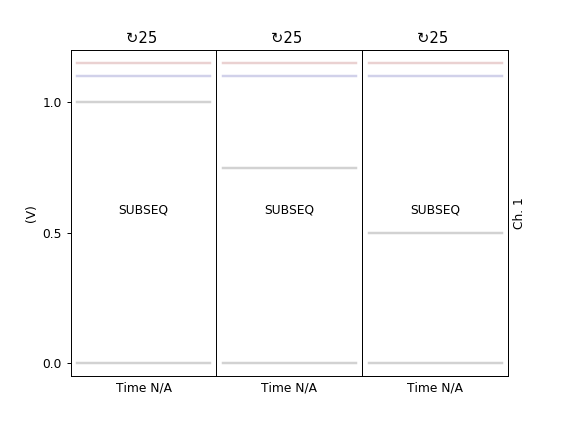

In [11]:
mainseq = bb.Sequence()
mainseq.setSR(SR)

mainseq.addSubSequence(1, seq)
mainseq.addSubSequence(2, seq2)
mainseq.addSubSequence(3, seq3)

mainseq.setSequencingNumberOfRepetitions(1, 25)
mainseq.setSequencingNumberOfRepetitions(2, 25)
mainseq.setSequencingNumberOfRepetitions(3, 25)

mainseq.plotSequence()

# The plotting does not show the details of the subsequence,
# but it DOES show the min and max voltages of a subsequence
# as grey lines

In [12]:
# The number of points is still low
mainseq.points

13560